# **VENTA TOTAL Categoría FyV predictions**

## **Importar librerías**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [ ]:
# facebook prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

## **Cargar datos**

In [2]:
cat_fecha_fyv = pd.read_csv('../../data/sql/venta_total/categoria/cat_fecha_fyv.csv')

## **Predicciones**

### **Prophet**

In [3]:
cat_fecha_fyv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fecha        124 non-null    object
 1   dia_semana   124 non-null    object
 2   categoria    124 non-null    object
 3   venta_total  124 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.0+ KB


In [4]:
cat_fecha_fyv

,fecha,dia_semana,categoria,venta_total
0,2023-01-02,lunes,Fruta y verdura,4133
1,2023-01-03,martes,Fruta y verdura,2658
2,2023-01-04,miércoles,Fruta y verdura,3235
3,2023-01-05,jueves,Fruta y verdura,2480
4,2023-01-07,sábado,Fruta y verdura,6360
...,...,...,...,...
119,2023-05-25,jueves,Fruta y verdura,2592
120,2023-05-26,viernes,Fruta y verdura,4995
121,2023-05-27,sábado,Fruta y verdura,6334
122,2023-05-29,lunes,Fruta y verdura,4238


In [5]:
# crear dataframe para Prophet
df_fyv_prophet = cat_fecha_fyv[['fecha', 'venta_total']].copy()
df_fyv_prophet.columns = ['ds', 'y']

# cambiar columna "ds" sea tipo "datetime"
df_fyv_prophet['ds'] = pd.to_datetime(df_fyv_prophet['ds'])

df_fyv_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      124 non-null    datetime64[ns]
 1   y       124 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 KB


In [6]:
# crear objeto de modelo Prophet
m = Prophet()

# ajustar modelo a los datos
m.fit(df_fyv_prophet)

18:08:08 - cmdstanpy - INFO - Chain [1] start processing
18:08:08 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# generar dataframe con fechas futuras
fechas_futuras_fyv = m.make_future_dataframe(periods=30)

fechas_futuras_fyv

,ds
0,2023-01-02
1,2023-01-03
2,2023-01-04
3,2023-01-05
4,2023-01-07
...,...
149,2023-06-25
150,2023-06-26
151,2023-06-27
152,2023-06-28


In [8]:
# realizar predicciones
preds_fyv_prophet = m.predict(fechas_futuras_fyv)

preds_fyv_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-02,3953.228433,3807.799607,4249.142426,3953.228433,3953.228433,73.559727,73.559727,73.559727,73.559727,73.559727,73.559727,0.0,0.0,0.0,4026.788160
1,2023-01-03,3952.911983,2388.945571,2839.702386,3952.911983,3952.911983,-1341.092889,-1341.092889,-1341.092889,-1341.092889,-1341.092889,-1341.092889,0.0,0.0,0.0,2611.819094
2,2023-01-04,3952.595533,2852.798640,3275.389369,3952.595533,3952.595533,-893.714593,-893.714593,-893.714593,-893.714593,-893.714593,-893.714593,0.0,0.0,0.0,3058.880940
3,2023-01-05,3952.279082,2404.743185,2846.892356,3952.279082,3952.279082,-1323.096375,-1323.096375,-1323.096375,-1323.096375,-1323.096375,-1323.096375,0.0,0.0,0.0,2629.182708
4,2023-01-07,3951.646182,6247.394123,6692.517528,3951.646182,3951.646182,2525.302498,2525.302498,2525.302498,2525.302498,2525.302498,2525.302498,0.0,0.0,0.0,6476.948680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,2023-06-25,3972.140540,3845.352161,4263.238689,3970.837866,3973.561454,86.474253,86.474253,86.474253,86.474253,86.474253,86.474253,0.0,0.0,0.0,4058.614792
150,2023-06-26,3972.430137,3807.126254,4261.697325,3971.042282,3973.954266,73.559727,73.559727,73.559727,73.559727,73.559727,73.559727,0.0,0.0,0.0,4045.989864
151,2023-06-27,3972.719734,2411.392080,2839.907587,3971.261372,3974.333434,-1341.092889,-1341.092889,-1341.092889,-1341.092889,-1341.092889,-1341.092889,0.0,0.0,0.0,2631.626846
152,2023-06-28,3973.009331,2872.862403,3279.647369,3971.483891,3974.699062,-893.714593,-893.714593,-893.714593,-893.714593,-893.714593,-893.714593,0.0,0.0,0.0,3079.294739


In [9]:
# filtrar dataframe con predicciones
preds_fyv_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-02,4026.788160,3807.799607,4249.142426
1,2023-01-03,2611.819094,2388.945571,2839.702386
2,2023-01-04,3058.880940,2852.798640,3275.389369
3,2023-01-05,2629.182708,2404.743185,2846.892356
4,2023-01-07,6476.948680,6247.394123,6692.517528
...,...,...,...,...
149,2023-06-25,4058.614792,3845.352161,4263.238689
150,2023-06-26,4045.989864,3807.126254,4261.697325
151,2023-06-27,2631.626846,2411.392080,2839.907587
152,2023-06-28,3079.294739,2872.862403,3279.647369


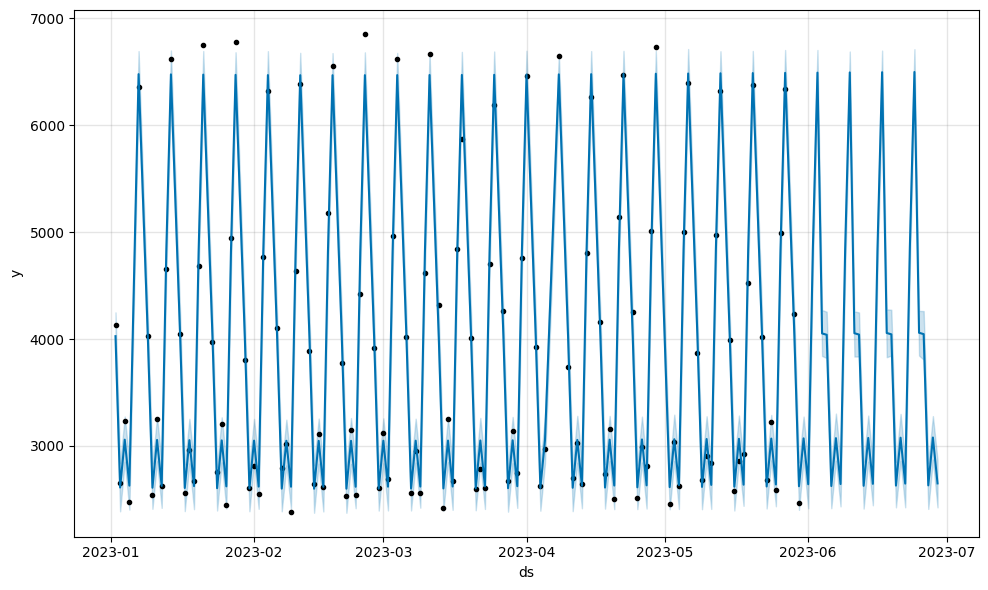

In [10]:
# visualizar predicciones
fyv_plot_1 = m.plot(preds_fyv_prophet)

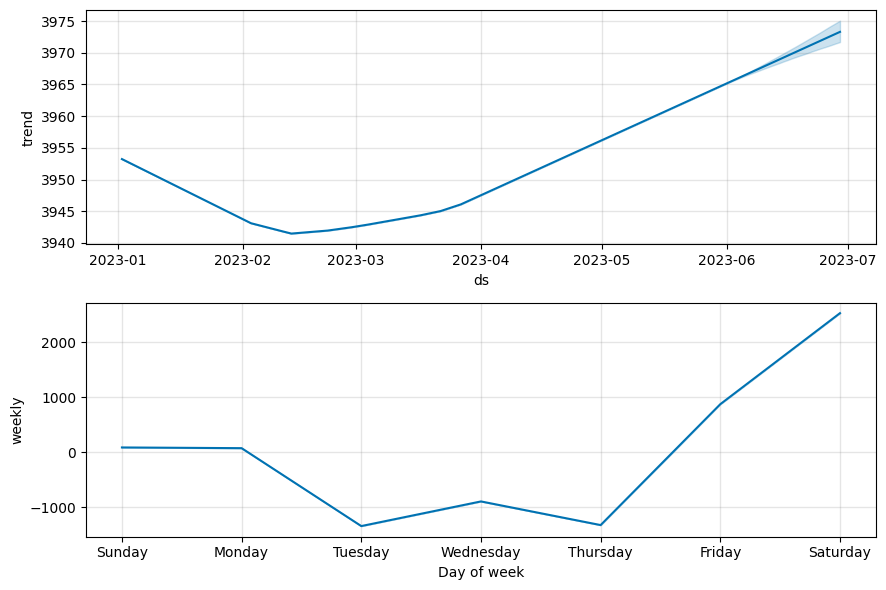

In [11]:
fyv_plot_2 = m.plot_components(preds_fyv_prophet)

In [12]:
fyv_plot_3 = plot_plotly(m, preds_fyv_prophet)

fyv_plot_3

In [13]:
fyv_plot_4 = plot_components_plotly(m, preds_fyv_prophet)

fyv_plot_4